# Lindeberg-Levy CLT

**26 Aug, 2024**

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "**.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "tutorial5.ipynb" file
* Complete exercises in "tutorial5.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

## Notation
* Suppose $X_1, X_2, ..., X_n$ is a sequence of i.i.d. random variables with expected value $\mathbb{E}[X_i]=\mu$ and $Var(X_i)=\sigma^2<\infty$.
* For example:
    1. Binomial Distribution
    2. Uniform Distribution
    3. Poisson Distribution
    4. Exponential Distribution, etc
* When $n$ approaches infinity, the random variable $\sqrt{n}(\bar{X}_n - \mu)$ converge in distribution to $\mathcal{N}(0, \sigma^2)$.

**Exercise 1: sample from discrete distributions with varied number of sample size to prove CLT**

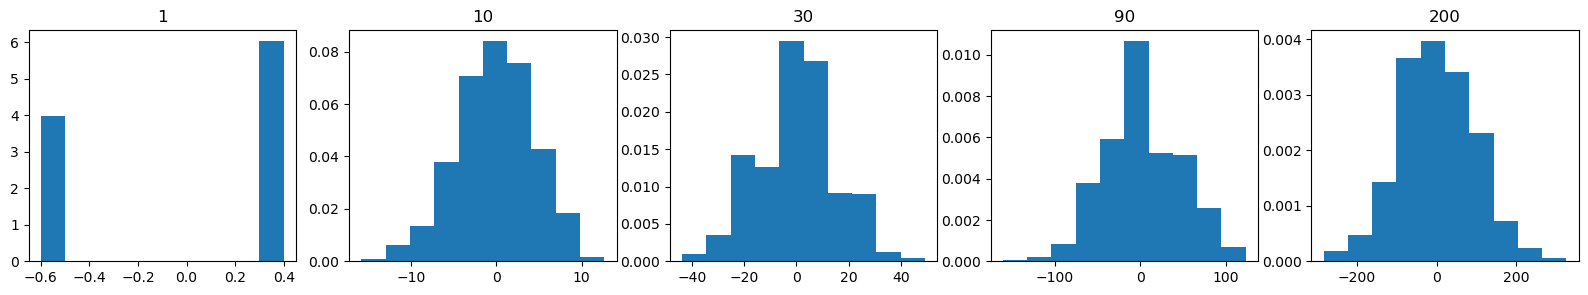

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# setting the values of n and p 
n_list = [1, 10, 30, 90, 200]
p = 0.6

dist_list = []
for n in n_list:
    # conduct 1000 experimental trials to sample from binomial distirbution using ``binom'',
    # and save the distribution result in ``dist_list''.
    Todo

k = 0
fig, ax = plt.subplots(1, 5, figsize =(20, 3))
for i in range(0, 5):
    # Histogram for each x stored in means
    ax[i].hist(dist_list[k], 10, density = True)
    ax[i].set_title(label = n_list[k])
    k = k + 1
plt.show()


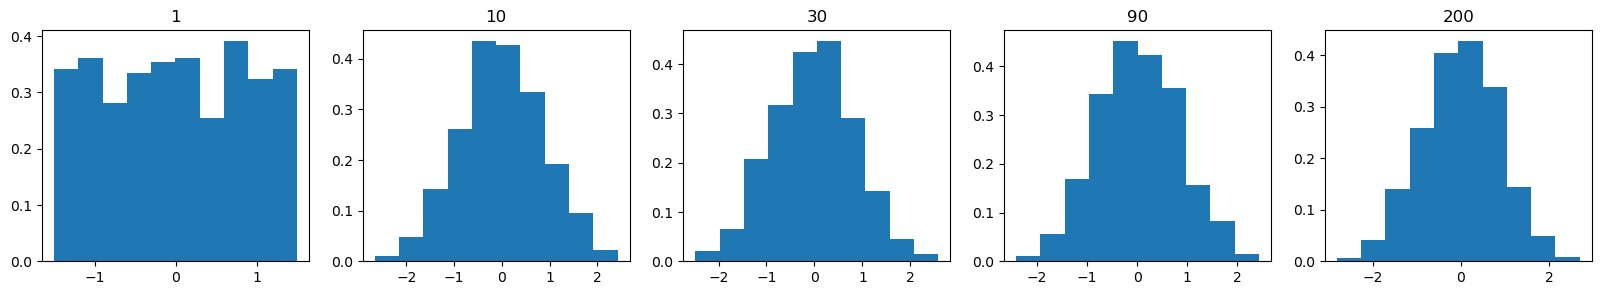

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# setting the values of n and p 
n_list = [1, 10, 30, 90, 200]
a, b = -1, 3

dist_list = []
for n in n_list:
    # conduct 1000 experimental trials to sample from uniform distirbution using ``uniform'',
    # and save the distribution result in ``dist_list''.
    Todo

k = 0
fig, ax = plt.subplots(1, 5, figsize =(20, 3))
for i in range(0, 5):
    # Histogram for each x stored in means
    ax[i].hist(dist_list[k], 10, density = True)
    ax[i].set_title(label = n_list[k])
    k = k + 1
plt.show()


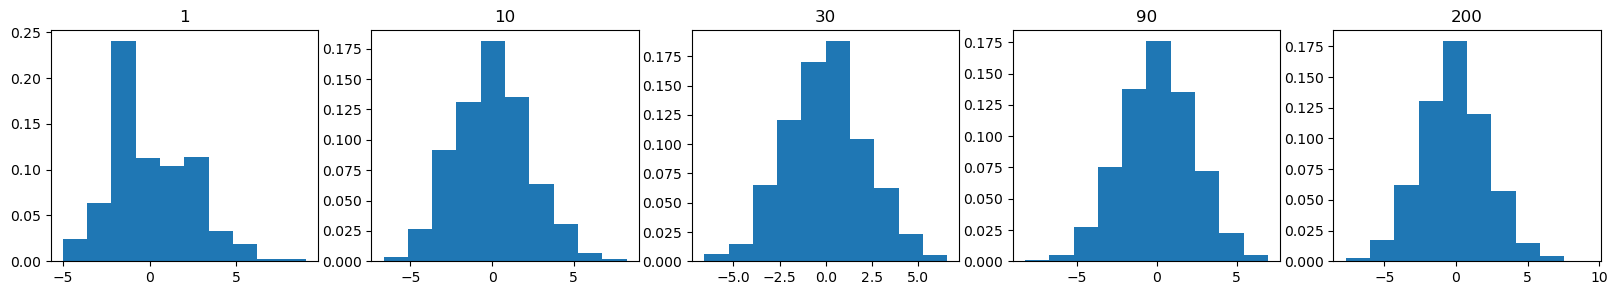

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# setting the values of n and p 
n_list = [1, 10, 30, 90, 200]
mu = 5

dist_list = []
for n in n_list:
    # conduct 1000 experimental trials to sample from poisson distirbution using ``poisson'',
    # and save the distribution result in ``dist_list''.
    Todo

k = 0
fig, ax = plt.subplots(1, 5, figsize =(20, 3))
for i in range(0, 5):
    # Histogram for each x stored in means
    ax[i].hist(dist_list[k], 10, density = True)
    ax[i].set_title(label = n_list[k])
    k = k + 1
plt.show()

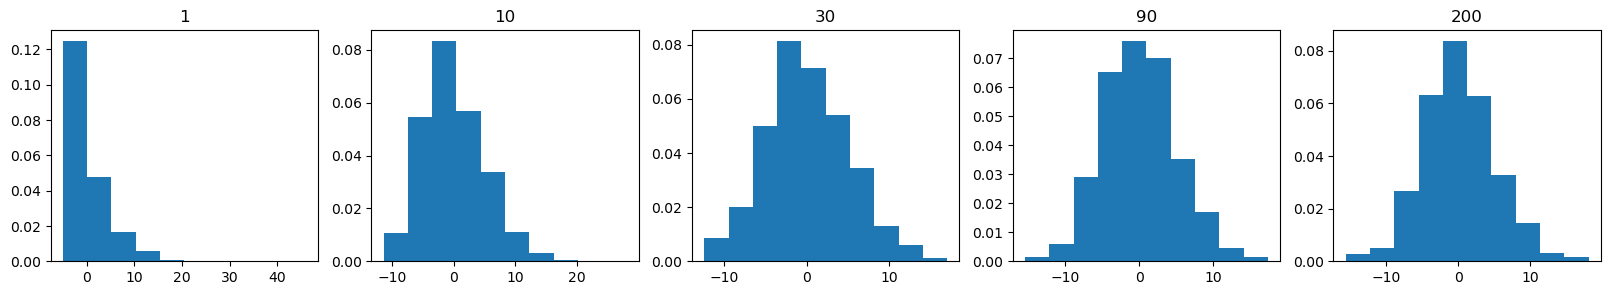

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# setting the values of n and p 
n_list = [1, 10, 30, 90, 200]
a, b = 0, 5

dist_list = []
for n in n_list:
    # conduct 1000 experimental trials to sample from exponential distirbution using ``expon'',
    # and save the distribution result in ``dist_list''.
    Todo

k = 0
fig, ax = plt.subplots(1, 5, figsize =(20, 3))
for i in range(0, 5):
    # Histogram for each x stored in means
    ax[i].hist(dist_list[k], 10, density = True)
    ax[i].set_title(label = n_list[k])
    k = k + 1
plt.show()

# Hoeffding's Inequality

### Notation
* Consider the differences between the expected risk and empirical risk $|R(h) - R_s(h)|$, which can be equivalently expressed as $|\mathbb{E}\left[\ell(X, Y, h)\right]-\frac{1}{n}\sum_{i=1}^n\ell(X_i, Y_i, h)|$, where we assumed that $\ell(X_1, Y_1, h)...\ell(X_n, Y_n, h)$ are independent and bounded by [0, M]. 
* We have:
$$
\begin{aligned}
p(|\mathbb{E}\left[\ell(X, Y, h)\right] - \frac{1}{n}\sum_{i=1}^n\ell(X_i, Y_i, h)|\ge t) \le \exp(\frac{-2nt^2}{M^2})
\end{aligned}
$$

* Suppose we have $t$ and $M$ as known, we can apply Hoeffding's Inequality to find the right number of data needed.

### Task 1: Classification
#### Visualization of the Training Data
* We generate a simple binary classification problem, and consider the case in which the target concept is included in the predefined hypothesis class $\mathcal{H}$. In this case, $h^*=c$ and the approximation error will be 0.

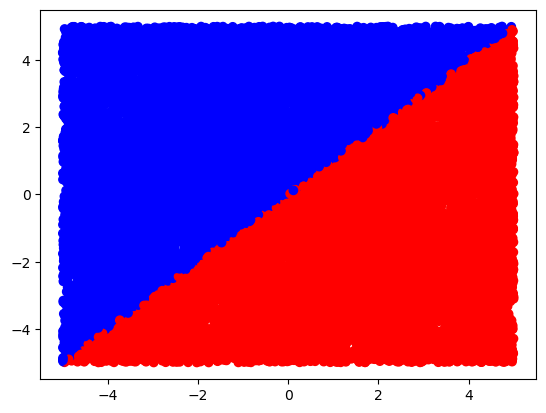

In [118]:
import numpy as np
import matplotlib.pyplot as plt

nsample = 20000
X = -5 + 10*np.random.rand(2, nsample)
Y = np.zeros(nsample)
for i in range(nsample):
    if X[0][i]-X[1][i]>=0:
        Y[i] = 1
    else:
        Y[i] = -1

# visualization of the training data
plt.scatter(X[0],X[1],c=['b' if X[0][i]-X[1][i]<0.0 else 'r' for i in range(nsample)])
plt.show()

#### Given the estimated parameters, compute the empirical risk.

In [91]:
def empiricalRisk(X, Y, w):
   """Compute the empirical risk of hypothesis function with parameter w.
   Input: 
      X: array, shape = [d, n]
         The features. Here, d is the dimension of features, n is the sample size.
      Y: array, shape = [n]
         The labels.
      w: array, shape = [d]
         The parameter of the hypothesis function.
   Output:
      risk: real value
         The empirical risk of this hypothesis function with parameter w.
   """
   n = len(Y)
   
   tmp = X.T.dot(w)
   tmp = tmp*Y
   
   errors = [1 if tmp[i]<=0 else 0 for i in range(n)]
   risk = sum(errors) * 1.0 / n
   
   return risk

# an example
w = np.array([1,-1])
print(empiricalRisk(X, Y, w))

0.0


#### Classifier: Linear Logistic Regression
* Using Logistic Regression to estimate the parameters of hypothesis function, then compute the estimation error.

In [92]:
import numpy.linalg as lng
def linearLR(X, Y, lr, maxiter, tol):
    """Estimate parameters of hypothesis function.
    Input: 
       X: array, shape = [d, n]
          The features. Here, d is the dimension of features, n is the sample size.
       Y: array, shape = [n]
          The labels.
       lr: real value
          The learning rate.
       maxiter: int
          The maximum number of iterations.
       tol: real value.
          The tolerance used for stopping the iterative process.
    Output:
       w: array, shape = [d]
          The estimated parameters of hypothesis function.
    """
    
    dim = X.shape[0]
    n = X.shape[1]
    
    # initialize parameters
    w = 0.01*np.random.random((dim, 1))

    # in this tutorial, we use the norm of gradient as a stop criteria.
    diff = float('Inf')

    iters = 0
    while (iters < maxiter) and (diff > tol):
        # compute gradient of w and update w   
        tmp = np.zeros((n,1))
        for i in range(n):
            # u stores the probability p(y=1|x) 
            u = 1.0/(1.0 + np.exp(-np.dot(X[:,i],w)))
            if Y[i] == 1:
                tmp[i] = u-1
            else:
                tmp[i] = u
    
        grad = np.dot(X, tmp)
    
        w_new = w - lr * grad
        diff = lng.norm(grad)**2
    
        w = w_new
        iters += 1
        
    return w.flatten() 

* To testify Hoeffding's Inequality, we first hope the probability of estmiation error greater than or equal to $t$ is smaller than $\sigma$, and we can obtain $M=b-a$ from the loss value $\ell\in\left[a, b\right]$, then we can have:
$$
\begin{aligned}
n\ge\frac{M^2ln(\frac{2}{\sigma})}{2t^2}
\end{aligned}
$$

#### Then, let's conduct 100 experimental trials to tesitfy how many examples we need to satisfy Hoeffding's Inequality.

**Exercise 2.1: For classification task, varying the number of sample size, compute the probability of estimation error greater than $t$.**

Given 10 number of examples, the probability of estimation error greater than t=0.01 is 0.94.
Given 110 number of examples, the probability of estimation error greater than t=0.01 is 0.82.
Given 210 number of examples, the probability of estimation error greater than t=0.01 is 0.68.
Given 310 number of examples, the probability of estimation error greater than t=0.01 is 0.5.
Given 410 number of examples, the probability of estimation error greater than t=0.01 is 0.51.
Given 510 number of examples, the probability of estimation error greater than t=0.01 is 0.37.
Given 610 number of examples, the probability of estimation error greater than t=0.01 is 0.29.
Given 710 number of examples, the probability of estimation error greater than t=0.01 is 0.23.
Given 810 number of examples, the probability of estimation error greater than t=0.01 is 0.2.
Given 910 number of examples, the probability of estimation error greater than t=0.01 is 0.17.


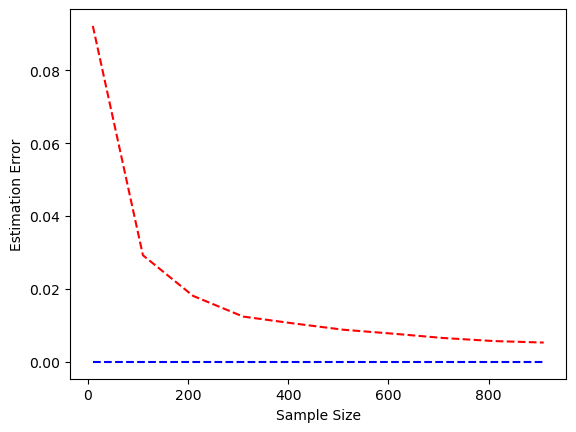

In [123]:
num = range(10,1000,100)

risk_list = []
for n in num:
    estimation_error_list = []

    for i in range(100):
        # Step 1: Shuffle the data and sample ``n'' number of examples.
        # Step 2: Fit the model to the sample.
        # Step 3: Compute the estimation error for experimental trial ``i'', save the result in ``estimation_error_list''.
        Todo
        
    prob = len([err for err in estimation_error_list if err > 0.01]) / 100.
    print(f'Given {n} number of examples, the probability of estimation error greater than t=0.01 is {prob}.')

    risk_list.append(sum(estimation_error_list) / len(estimation_error_list))

plt.plot(num,risk_list,'r--', num, [0]*len(num), 'b--')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.show()

### Task 2: Linear Regression
* Second, we consider the case in which the target concept is not included in the predefined hypothesis class $\mathcal{H}$. In this case, $h^*\neq c$ and the approximation error will not be 0.

* Here, we use linear regression as an example.

* We set the target concept as $y = x^2$ where $x \in [0,1]$.

* We assume the hypothesis function is linear; that is $h(x,\beta_0,\beta_1) = \beta_0 x+\beta_1$. Then, it is easy to see that the target concept is not included in the predefined hypothesis class. Therefore the approximation error is not 0.

#### Visualization of the Training Data

[0.91225189 0.25747177 0.71216322 ... 0.57485904 0.18887606 0.11474868]


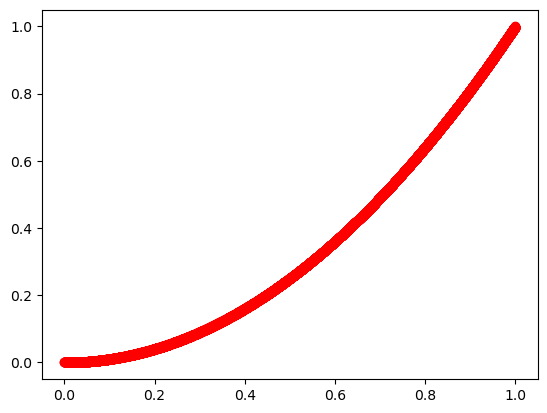

In [3]:
nsample = 20000
X = np.random.rand(nsample)
Y = X*X
print(X)

# visualization of the training data
plt.scatter(X,Y,c='r')
plt.show()

#### Square Loss and Empirical Risk
* In linear regression, we exploit square loss to evaluate a hypothesis function; that is $\ell(X,Y,h) = (Y-h(X))^2$.

In [4]:
def empiricalRiskSquareLoss(X,Y,beta_0,beta_1):
   """Compute the empirical risk of hypothesis function with parameter w.
   Input: 
      X: array, shape = [n]
         The features. The feature is one dimensional.
      Y: array, shape = [n]
         The labels.
      beta_0, beta_1: real values
         The parameter of the hypothesis function.
   Output:
      risk: real value
         The empirical risk of this hypothesis function with parameter w.
   """
   target = beta_0 * X + beta_1
   loss = (target - Y)*(target - Y)
   loss = sum(loss)/len(Y)
   return loss

print(empiricalRiskSquareLoss(X,Y,1,0))

0.03344235785048932


* Given the training data, estimate the parameters of hypothesis function by using least square method.

In [6]:
def linearRegression(X,Y):
   """Estimate parameters of hypothesis function.
   Input: 
      X: array, shape = [n]
         The features. The feature is one dimensional.
      Y: array, shape = [n]
         The labels.
   Output:
      beta_0, beta_1: real values
         The estimated parameters of hypothesis function.
   """
   n = len(Y)
   mean_X = sum(X)/n
   mean_Y = sum(Y)/n

   den = sum([(item-mean_X)**2 for item in X])
   mol = sum([(X[i]-mean_X)*(Y[i]-mean_Y) for i in range(n)])
   beta_0 = mol/den
   beta_1 = mean_Y - beta_0 * mean_X
   
   return beta_0, beta_1

beta_0, beta_1 = linearRegression(X, Y)
loss = empiricalRiskSquareLoss(X, Y, beta_0, beta_1)
print(loss)
print(beta_0, beta_1)

0.005567604364334259
1.0003121385774665 -0.16711427015382452


#### Compute the parameters of the best hypothesis function $h^*$ and the approximation error.


(1) The form of $R(h)$ can be first computed. We can obtain $R(h)=\frac{1}{5}-\frac{\beta_0}{2}-\frac{2\beta_1}{3} + \beta_0 \beta_1 + \frac{\beta_0^2}{3} + \beta_1^2$. The computation of integral can be found at https://en.wikipedia.org/wiki/Integral.

(2) Let the gradients of $R(h)$ with respect to $\beta_0$ and $\beta_1$ to be 0. We can find the parameters of the best hypothesis function. 

* The results are: $\beta_{0}^*=1$, $\beta_{1}^*=-\frac{1}{6}$, and $R(h^*) = \frac{1}{180}$.

**Exercise 2.2: For linear regression task, varying the number of sample size, compute the probability of estimation error greater than $t$.**

Given 10 number of examples, the probability of estimation error greater than t=0.0001 is 0.94.
Given 110 number of examples, the probability of estimation error greater than t=0.0001 is 0.52.
Given 210 number of examples, the probability of estimation error greater than t=0.0001 is 0.22.
Given 310 number of examples, the probability of estimation error greater than t=0.0001 is 0.11.
Given 410 number of examples, the probability of estimation error greater than t=0.0001 is 0.05.
Given 510 number of examples, the probability of estimation error greater than t=0.0001 is 0.04.
Given 610 number of examples, the probability of estimation error greater than t=0.0001 is 0.03.
Given 710 number of examples, the probability of estimation error greater than t=0.0001 is 0.02.
Given 810 number of examples, the probability of estimation error greater than t=0.0001 is 0.0.
Given 910 number of examples, the probability of estimation error greater than t=0.0001 is 0.0.
Given 1010 number of examples, th

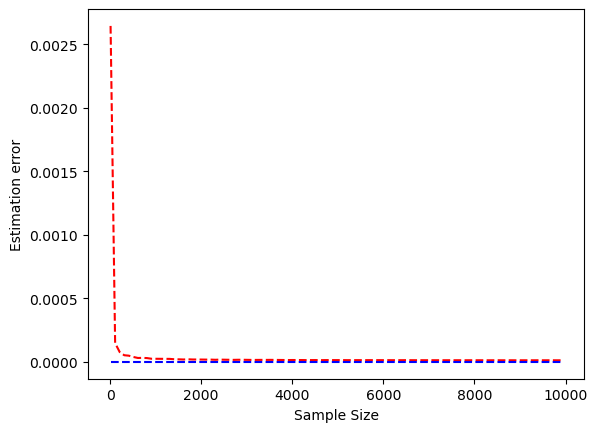

In [7]:
num = range(10,10000,100)

risk_list = []
for n in num:
    estimation_error_list = []

    for i in range(100):
        # Step 1: Shuffle the data and sample ``n'' number of examples.
        # Step 2: Fit the model to the sample.
        # Step 3: Compute the estimation error for experimental trial ``i'', save the result in ``estimation_error_list''.
        Todo

    prob = len([err for err in estimation_error_list if err > 0.0001]) / 100.
    print(f'Given {n} number of examples, the probability of estimation error greater than t=0.0001 is {prob}.')

    risk_list.append(sum(estimation_error_list) / len(estimation_error_list))
       
plt.plot(num,risk_list,'r--', num, [0]*len(num), 'b--')
plt.xlabel('Sample Size')
plt.ylabel('Estimation error')
plt.show()